Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.95879459 0.79051327]
 [0.02335393 0.97586401]
 [0.28630033 0.74669293]]
[-1.59985313 -0.69091242  0.73850843  0.99009625 -1.00743404]
[10 93 31 19 58 70 46 15  4  4]
[9 4 5]
[-0.568712   -0.62556775  0.09757328  0.92934285  1.27238267 -1.51697009
 -0.8510031   2.40950589  1.31685321 -0.62993298]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [37]:
# Write your code for AIM #1 here
import random
import pandas as pd
import numpy as np
import time


#numpy
start_time2 = time.time()
large_dataset_numpy = np.random.randint(1, 101, size=1000000)
time_taken_numpy = time.time() - start_time2
print(f"Time taken by NumPy: {time_taken_numpy} seconds")

Time taken by pandas: 0.5982577800750732 seconds
Time taken by NumPy: 0.006423234939575195 seconds


numpy is faster
Because numpy is written in c it is closer to the bottom of the computer and it is contiguous in the storage space. So it will be more efficient.
Pandas not only fouce on data but also for table and index. And those things will make pandas spand more times.

AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [77]:
# Write your code for AIM #2 here
import pandas as pd
import numpy as np
import time

# Loading the CSV file as an array in NumPy
start_time_numpy = time.time()
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
# Create separate arrays for the individual columns that you want to operate on

# For example, to create a separate array for 'Age' column
age = data['Age'].astype(int)
Sleep_Duration = data['Sleep_Duration'].astype(int)
systolic_bp = data['Systolic_blood_pressure'].astype(float)
diastolic_bp = data['Diastolic_blood_pressure'].astype(float)
heart_rate = data['Heart_Rate'].astype(float)
daily_steps = data['Daily_Steps'].astype(float)

mean_sleep_duration_numpy = np.mean(Sleep_Duration)
mean_systolic_bp_numpy = np.mean(systolic_bp)
mean_diastolic_bp_numpy = np.mean(diastolic_bp)
mean_heart_rate_numpy = np.mean(heart_rate)
mean_daily_steps_numpy = np.mean(daily_steps)
print("----------mean value--------")
print(f"mean_sleep_duration_numpy:{mean_sleep_duration_numpy}")
print(f"mean_systolic_bp_numpy:{mean_systolic_bp_numpy}")
print(f"mean_diastolic_bp_numpy:{mean_diastolic_bp_numpy}")
print(f"mean_heart_rate_numpy:{mean_heart_rate_numpy}")
print(f"mean_daily_steps_numpy:{mean_daily_steps_numpy}")


# Calculate the correlation in NumPy using np.corrcoef()
numeric_data = np.column_stack((Sleep_Duration, systolic_bp, diastolic_bp, heart_rate, daily_steps, age))
correlation_matrix_numpy = np.corrcoef(numeric_data.T)
print("------------correlation--------------")
print(correlation_matrix_numpy)

# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]
sleep_duration_age_corr_numpy = correlation_matrix_numpy[0, 5]
sleep_duration_heart_rate_corr_numpy = correlation_matrix_numpy[0, 3]
sleep_duration_daily_steps_corr_numpy = correlation_matrix_numpy[0, 4]

# Use np-std() to calculate Standard deviation
std_sleep_duration_numpy = np.std(Sleep_Duration)
time_taken_numpy = time.time() - start_time_numpy


----------mean value--------
mean_sleep_duration_numpy:6.759358288770054
mean_systolic_bp_numpy:128.55347593582889
mean_diastolic_bp_numpy:84.64973262032086
mean_heart_rate_numpy:70.16577540106952
mean_daily_steps_numpy:6816.844919786096
------------correlation--------------
[[ 1.         -0.13811884 -0.11864297 -0.51392113 -0.01198452  0.43664225]
 [-0.13811884  1.          0.97288499  0.29414292  0.10334222  0.60587844]
 [-0.11864297  0.97288499  1.          0.27109222  0.24198597  0.59383892]
 [-0.51392113  0.29414292  0.27109222  1.         -0.03030858 -0.22560619]
 [-0.01198452  0.10334222  0.24198597 -0.03030858  1.          0.0579734 ]
 [ 0.43664225  0.60587844  0.59383892 -0.22560619  0.0579734   1.        ]]


In [78]:
start_time_pandas = time.time()
data_pandas = pd.read_csv('sleep_health.csv')
print("----------mean value--------")
mean_sleep_duration_pandas = data_pandas['Sleep Duration'].mean()
print(f"mean sleep duration pandas:{mean_sleep_duration_pandas}")

mean_systolic_bp_pandas = data_pandas['Systolic blood pressure'].mean()
print(f"mean systolic bp pandas:{mean_systolic_bp_pandas}")

mean_diastolic_bp_pandas = data_pandas['Diastolic blood pressure'].mean()
print(f"mean diastolic bp pandas:{mean_diastolic_bp_pandas}")

mean_heart_rate_pandas = data_pandas['Heart Rate'].mean()
print(f"mean heart rate pandas:{mean_heart_rate_pandas}")

mean_daily_steps_pandas = data_pandas['Daily Steps'].mean()
print(f"mean daily steps pandas:{mean_daily_steps_pandas}")
print("----------correlation --------")
correlation_matrix_pandas = data_pandas.corr()
print(correlation_matrix_pandas)
print("---------- separate correlation  --------")
sleep_duration_age_corr_pandas = correlation_matrix_pandas['Sleep Duration']['Age']
print(f"sleep_duration_age_corr_pandas:{sleep_duration_age_corr_pandas}")
sleep_duration_heart_rate_corr_pandas = correlation_matrix_pandas['Sleep Duration']['Heart Rate']
print(f"sleep_duration_heart_rate_corr_pandas:{sleep_duration_heart_rate_corr_pandas}")
sleep_duration_daily_steps_corr_pandas = correlation_matrix_pandas['Sleep Duration']['Daily Steps']
print(f"sleep_duration_daily_steps_corr_pandas:{sleep_duration_daily_steps_corr_pandas}")
print("---------- standard deviation for 'Sleep Duration'  --------")
std_sleep_duration_pandas = data_pandas['Sleep Duration'].std()

time_taken_pandas = time.time() - start_time_pandas
print(f"Time take pandas:= {time_taken_pandas}")
print(f"Time take numpys:{time_taken_numpy}")
print(f"Pands - numpy={time_taken_pandas-time_taken_numpy}")

----------mean value--------
mean sleep duration pandas:7.132085561497325
mean systolic bp pandas:128.55347593582889
mean diastolic bp pandas:84.64973262032086
mean heart rate pandas:70.16577540106952
mean daily steps pandas:6816.844919786096
----------correlation --------
                          Person ID       Age  Sleep Duration  \
Person ID                  1.000000  0.990516        0.296305   
Age                        0.990516  1.000000        0.344709   
Sleep Duration             0.296305  0.344709        1.000000   
Quality of Sleep           0.431612  0.473734        0.883213   
Physical Activity Level    0.149882  0.178993        0.212360   
Stress Level              -0.394287 -0.422344       -0.811023   
Systolic blood pressure    0.611551  0.605878       -0.180406   
Diastolic blood pressure   0.590670  0.593839       -0.166570   
Heart Rate                -0.225467 -0.225606       -0.516455   
Daily Steps                0.043844  0.057973       -0.039533   

          

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

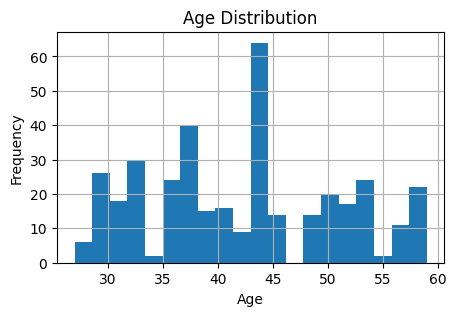

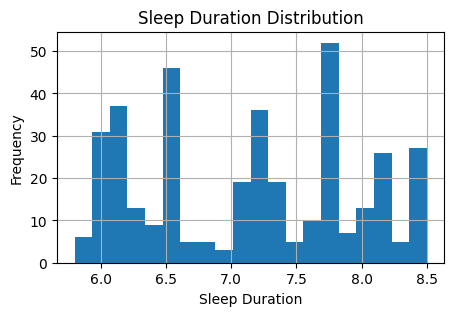

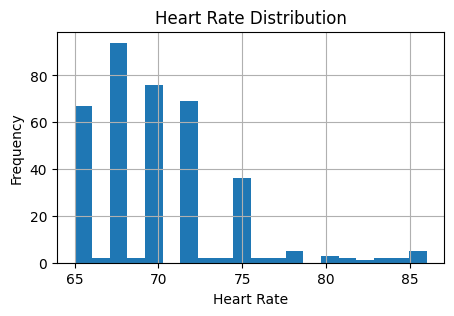

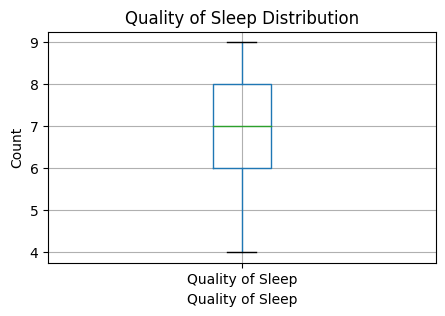

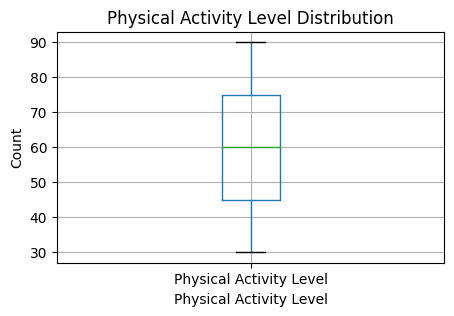

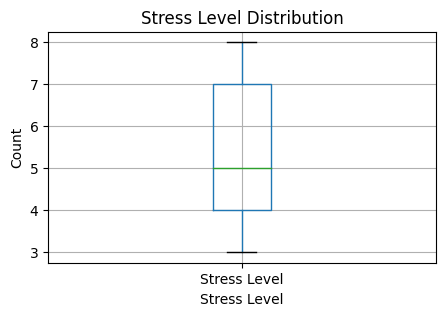

-----------------------------------------------------------------------------------------------------


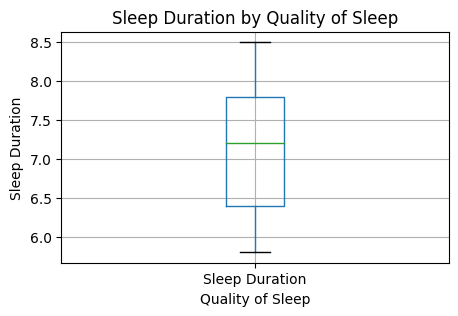

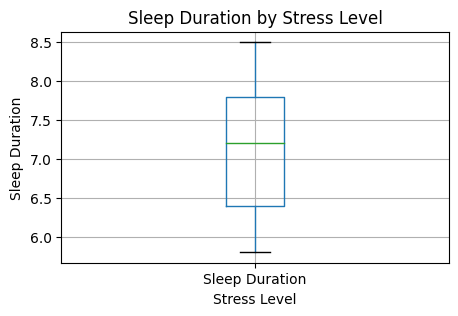

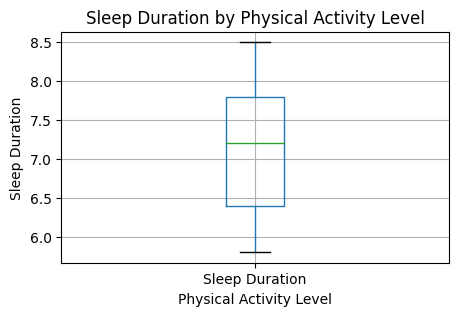

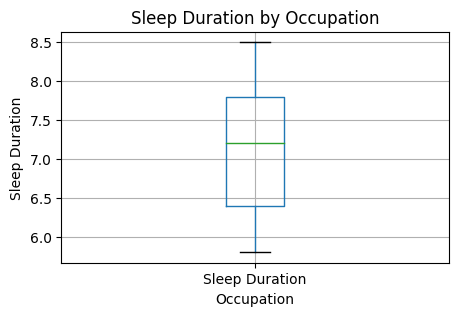

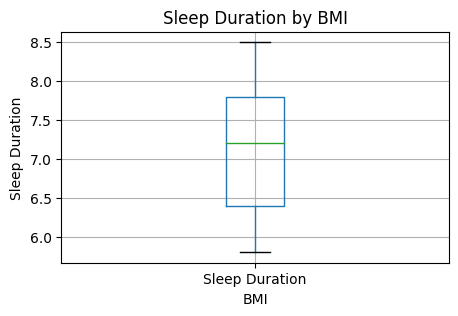

-----------------------------------------------------------------------------------------------------


<Figure size 500x300 with 0 Axes>

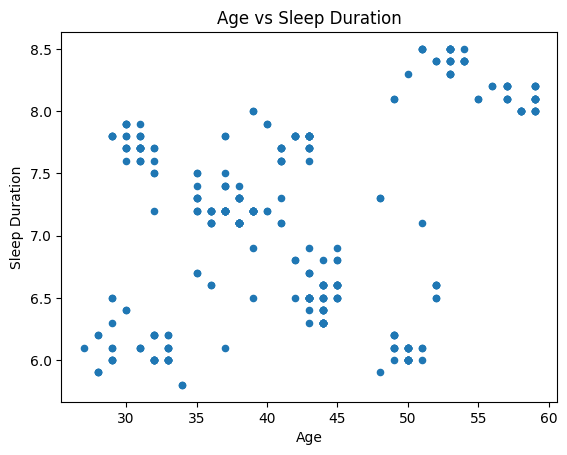

<Figure size 500x300 with 0 Axes>

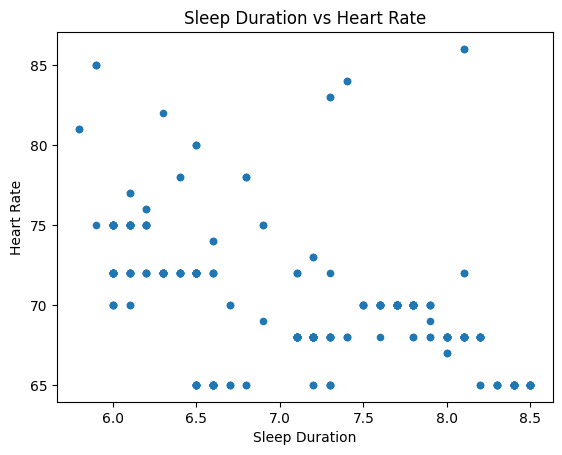

<Figure size 500x300 with 0 Axes>

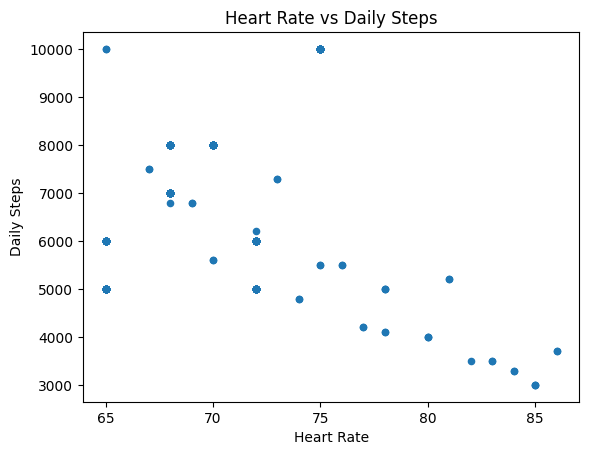

<Figure size 500x300 with 0 Axes>

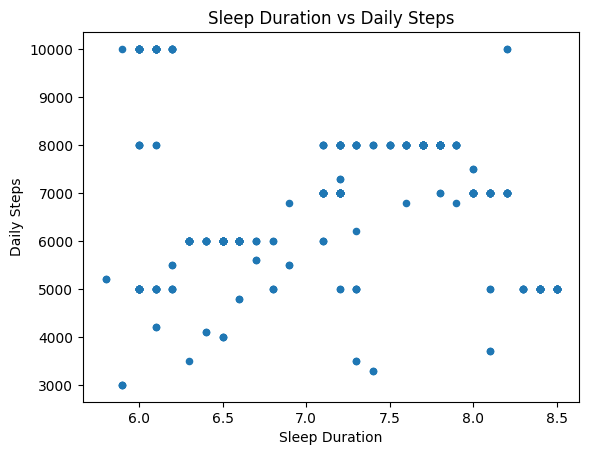

Pandas time: 1.1524455547332764


In [89]:
import matplotlib.pyplot as plt

start_time_pandas = time.time()
data_pandas = pd.read_csv('sleep_health.csv')
def plot_histogram(column, data, title, xlabel, ylabel):
    plt.figure(figsize=(5, 3))
    data[column].hist(bins=20)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_boxplot(column, data, title, xlabel, ylabel):
    plt.figure(figsize=(5, 3))
    data.boxplot(column=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
def plot_scatter(x, y, data, title):
    plt.figure(figsize=(5, 3))
    data.plot.scatter(x=x, y=y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


plot_histogram('Age', data_pandas, 'Age Distribution', 'Age', 'Frequency')
plot_histogram('Sleep Duration', data_pandas, 'Sleep Duration Distribution', 'Sleep Duration', 'Frequency')
plot_histogram('Heart Rate', data_pandas, 'Heart Rate Distribution', 'Heart Rate', 'Frequency')
plot_boxplot('Quality of Sleep', data_pandas, 'Quality of Sleep Distribution', 'Quality of Sleep', 'Count')
plot_boxplot('Physical Activity Level', data_pandas, 'Physical Activity Level Distribution', 'Physical Activity Level', 'Count')
plot_boxplot('Stress Level', data_pandas, 'Stress Level Distribution', 'Stress Level', 'Count')
print("-----------------------------------------------------------------------------------------------------")
plot_boxplot('Sleep Duration', data_pandas, 'Sleep Duration by Quality of Sleep', 'Quality of Sleep', 'Sleep Duration')
plot_boxplot('Sleep Duration', data_pandas, 'Sleep Duration by Stress Level', 'Stress Level', 'Sleep Duration')
plot_boxplot('Sleep Duration', data_pandas, 'Sleep Duration by Physical Activity Level', 'Physical Activity Level', 'Sleep Duration')
plot_boxplot('Sleep Duration', data_pandas, 'Sleep Duration by Occupation', 'Occupation', 'Sleep Duration')
plot_boxplot('Sleep Duration', data_pandas, 'Sleep Duration by BMI', 'BMI', 'Sleep Duration')
print("-----------------------------------------------------------------------------------------------------")
plot_scatter('Age', 'Sleep Duration', data_pandas, 'Age vs Sleep Duration')
plot_scatter('Sleep Duration', 'Heart Rate', data_pandas, 'Sleep Duration vs Heart Rate')
plot_scatter('Heart Rate', 'Daily Steps', data_pandas, 'Heart Rate vs Daily Steps')
plot_scatter('Sleep Duration', 'Daily Steps', data_pandas, 'Sleep Duration vs Daily Steps')
time_taken_pandas = time.time() - start_time_pandas
print(f"Pandas time: {time_taken_pandas}")

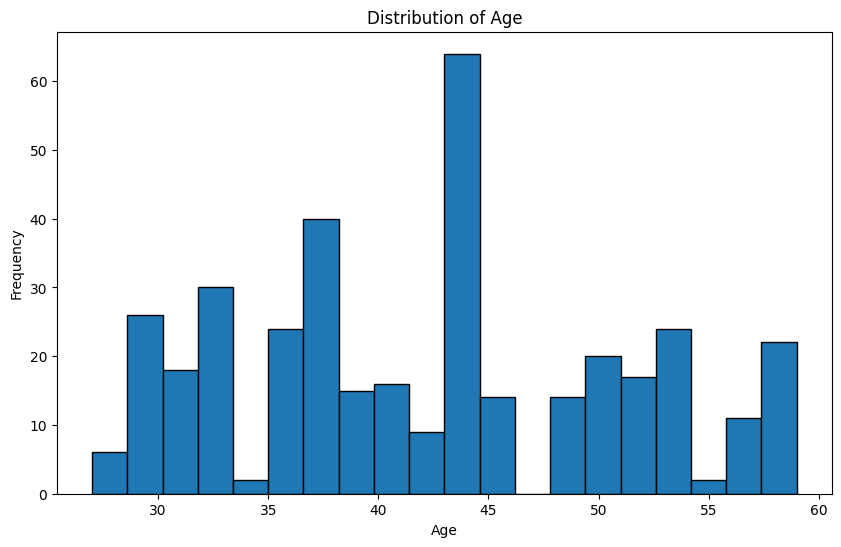

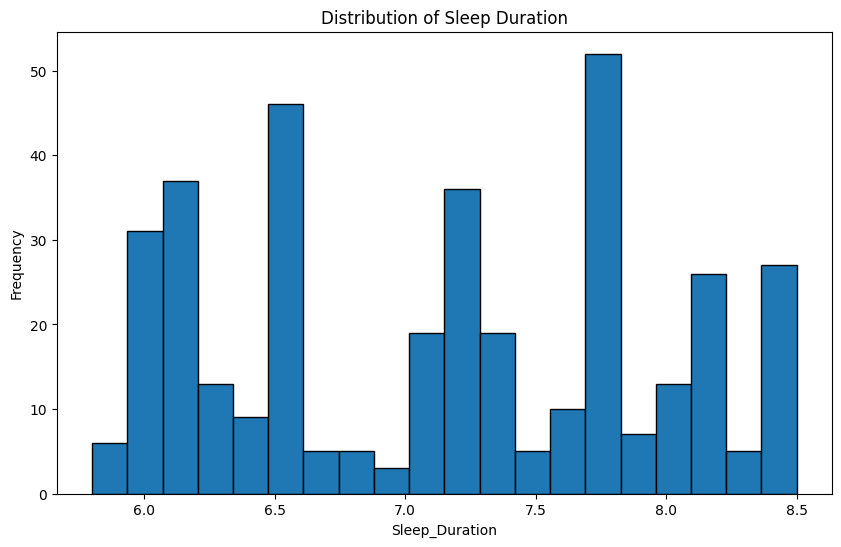

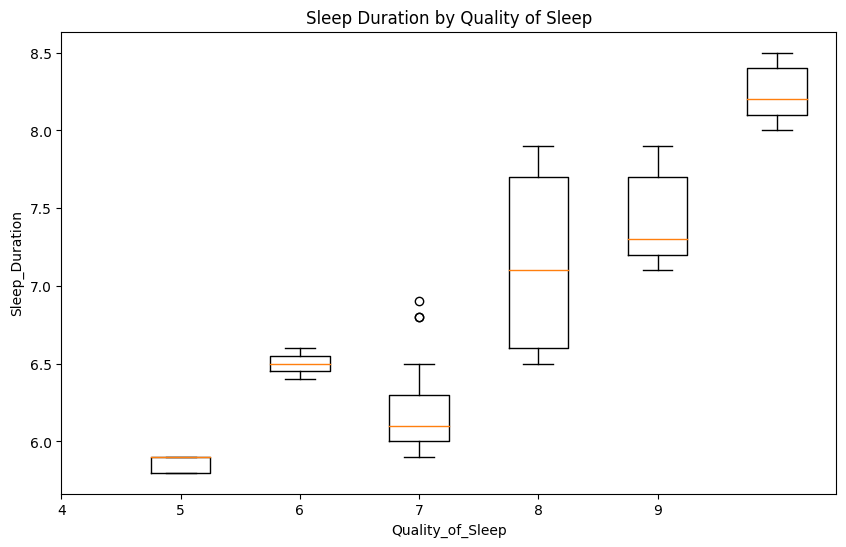

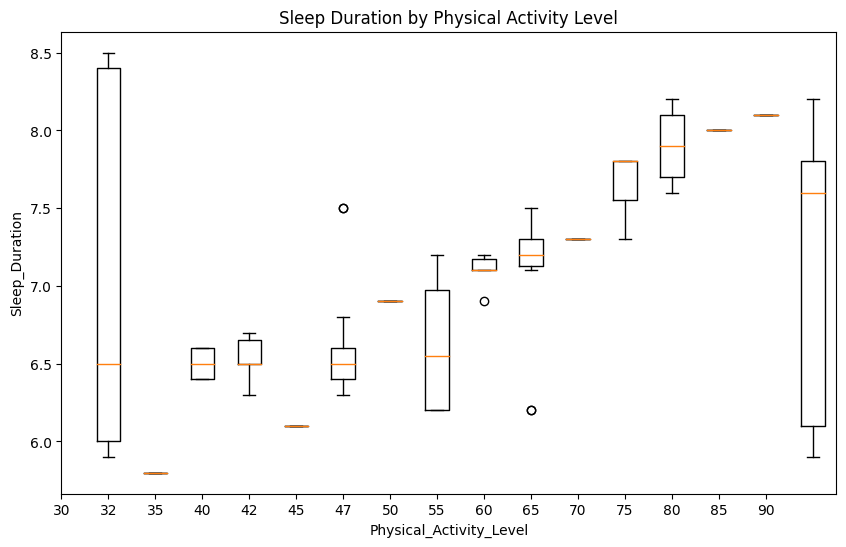

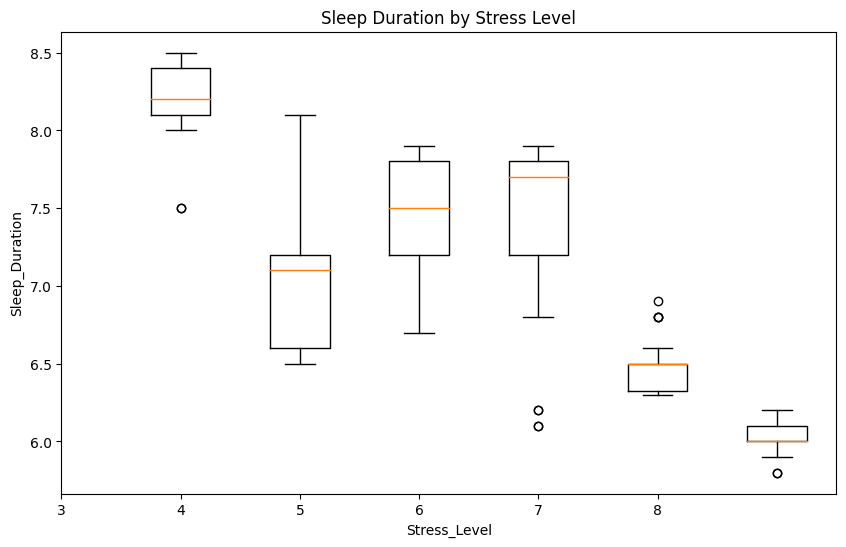

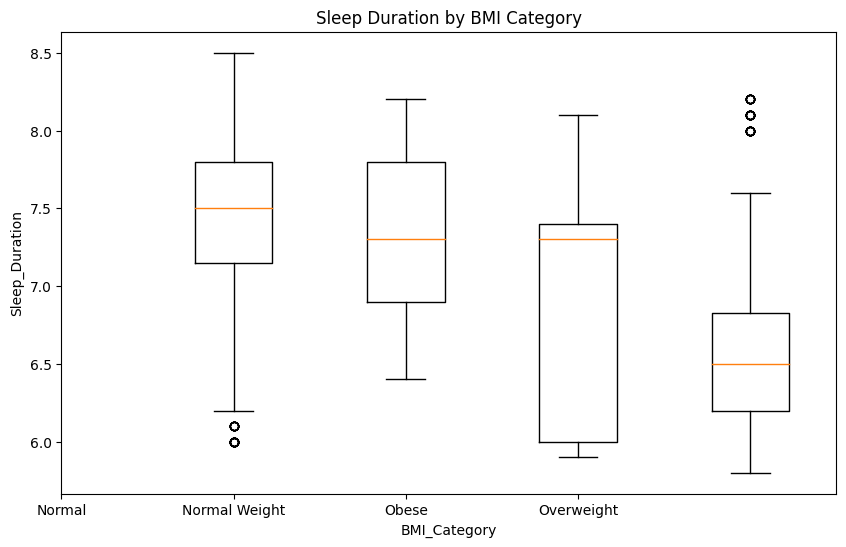

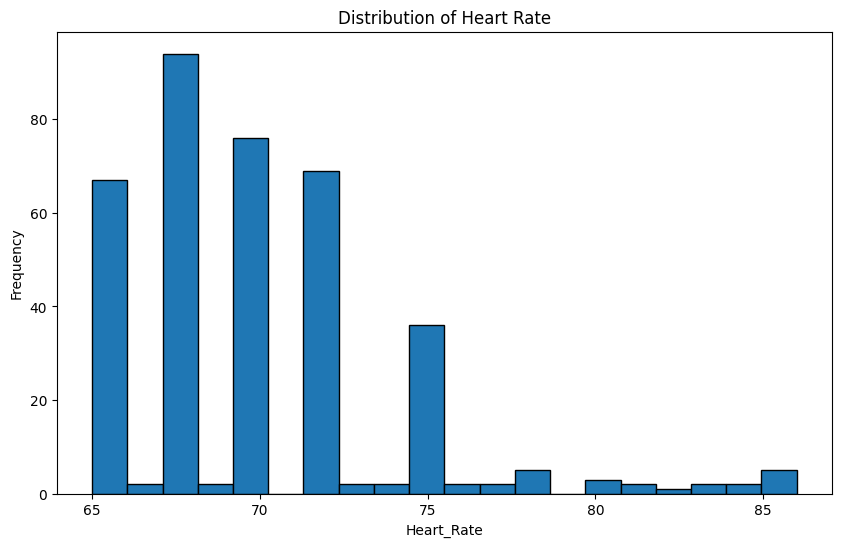

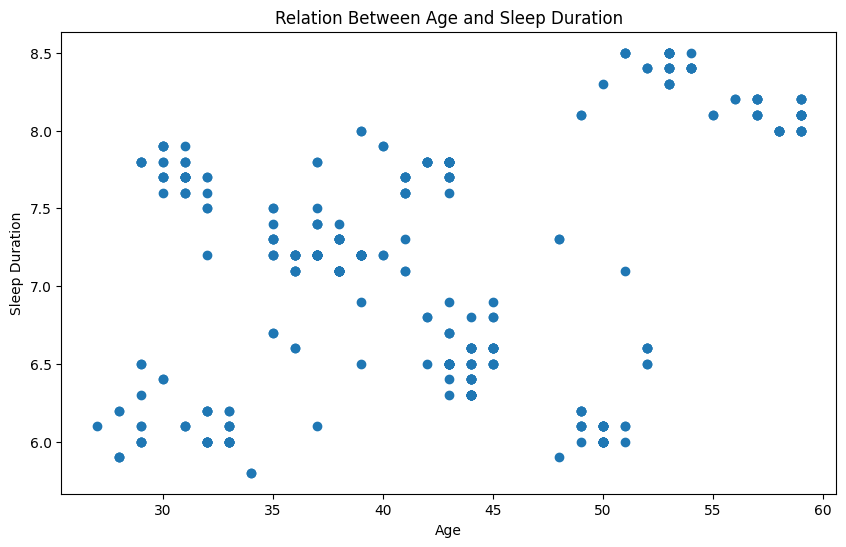

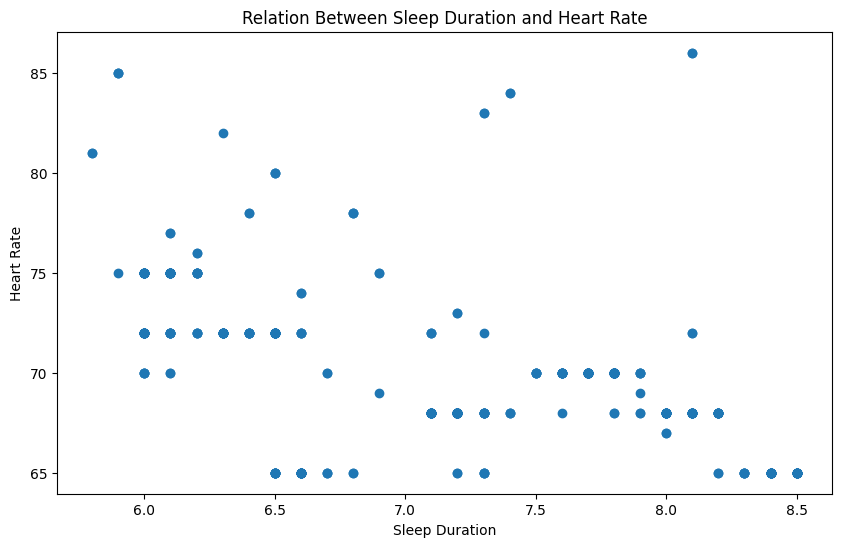

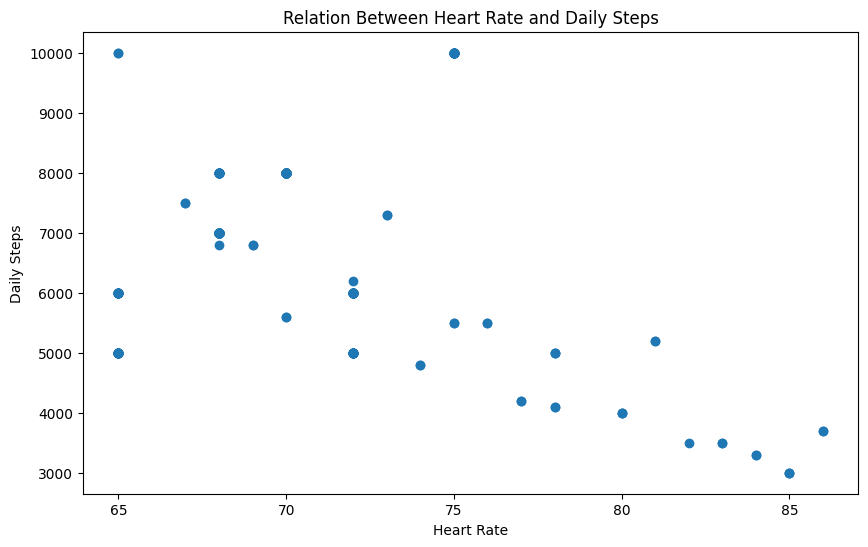

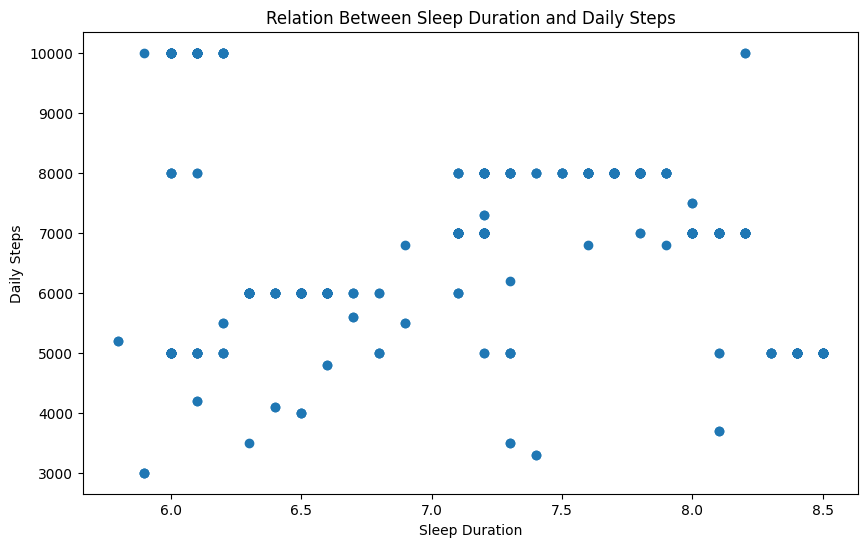

Numpy time: 1.1490771770477295
Numpy - pandas = -0.003368377685546875


In [107]:

# Write your code for AIM #3 here
data_numpy = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
start_time_numpy = time.time()
def plot_histogram(column, data, title):
    plt.figure(figsize=(10, 6))
    values = data[column].astype(float)
    plt.hist(values, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
def plot_boxplot(x_column, y_column, data, title):
    categories = np.unique(data[x_column])
    category_data = [data[data[x_column] == category][y_column] for category in categories]
    
    plt.figure(figsize=(10, 6))
    plt.boxplot([dat.astype(float) for dat in category_data], labels=categories)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(range(len(categories)), categories)
    plt.show()
def plot_grouped_histogram(y_column, x_column, data, title):
    unique_groups = np.unique(data[x_column])
    means = []
    for unique_group in unique_groups:
        group_data = data[data[x_column] == unique_group][y_column].astype(float)
        means.append(np.mean(group_data))
    plt.figure(figsize=(10, 6))
    plt.hist(means, bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel(y_column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram('Age', data, 'Distribution of Age')
plot_histogram('Sleep_Duration', data, 'Distribution of Sleep Duration')
plot_boxplot('Quality_of_Sleep', 'Sleep_Duration', data, 'Sleep Duration by Quality of Sleep')
plot_boxplot('Physical_Activity_Level', 'Sleep_Duration', data, 'Sleep Duration by Physical Activity Level')
plot_boxplot('Stress_Level', 'Sleep_Duration', data, 'Sleep Duration by Stress Level')
plot_boxplot('BMI_Category', 'Sleep_Duration', data, 'Sleep Duration by BMI Category')
plot_histogram('Heart_Rate', data, 'Distribution of Heart Rate')


plot_scatter('Age', 'Sleep_Duration', data, 'Relation Between Age and Sleep Duration')
plot_scatter('Sleep_Duration', 'Heart_Rate', data, 'Relation Between Sleep Duration and Heart Rate')
plot_scatter('Heart_Rate', 'Daily_Steps', data, 'Relation Between Heart Rate and Daily Steps')
plot_scatter('Sleep_Duration', 'Daily_Steps', data, 'Relation Between Sleep Duration and Daily Steps')




time_taken_numpy = time.time() - start_time_numpy
print(f"Numpy time: {time_taken_numpy}")
print(f"Numpy - pandas = {time_taken_numpy-time_taken_pandas}")

    AIM #4: Other possible plotting

    1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



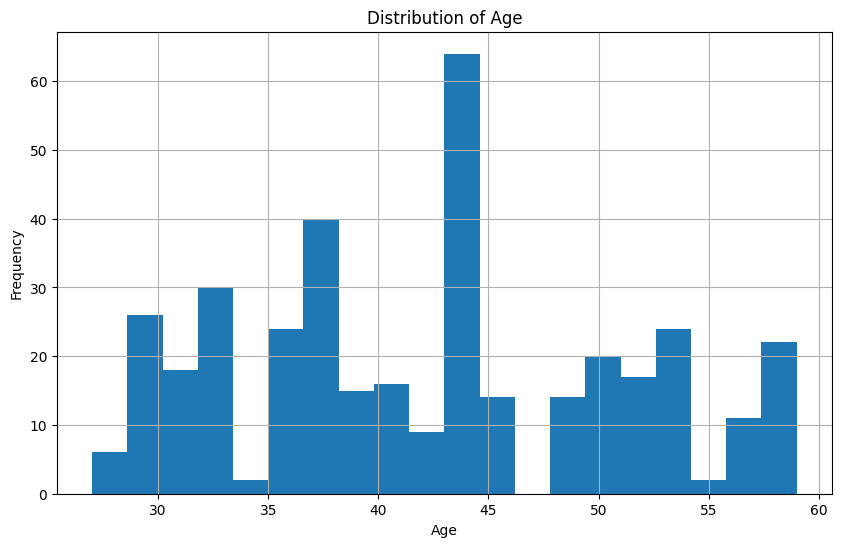

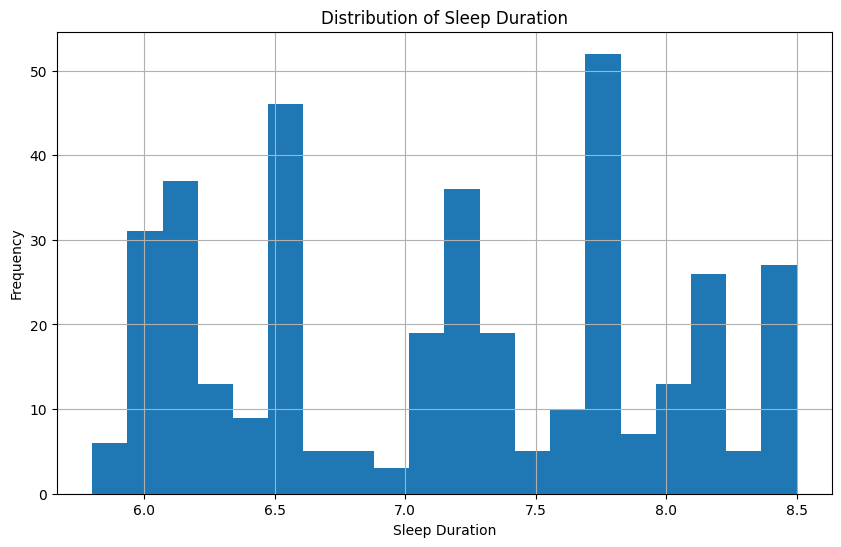

<Figure size 1000x600 with 0 Axes>

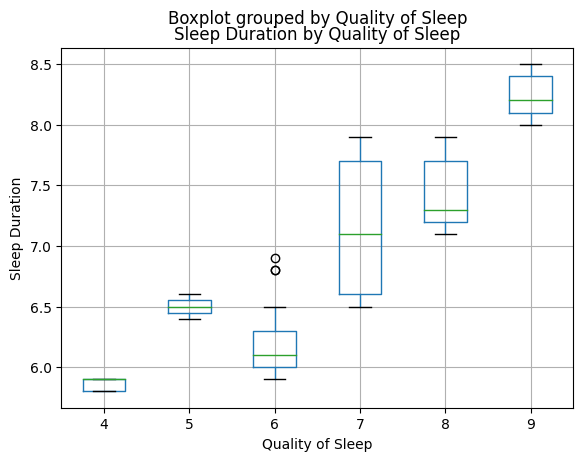

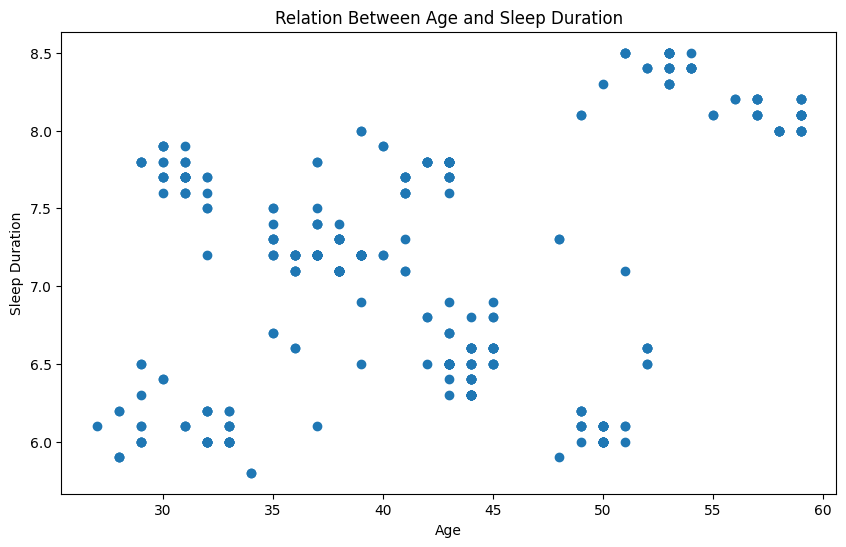

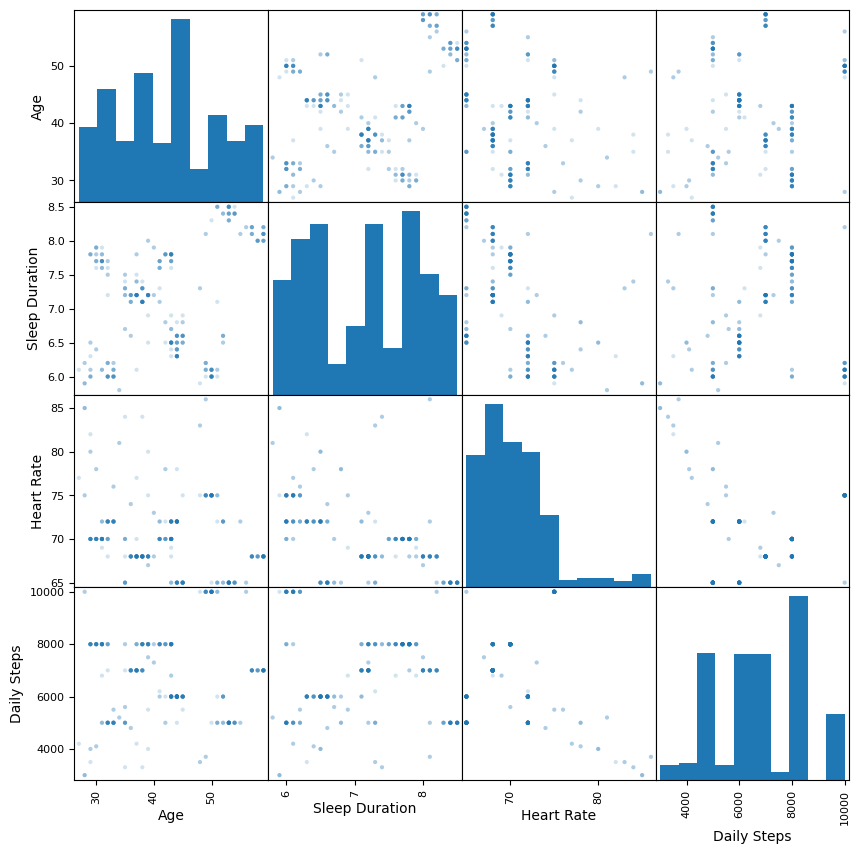

In [116]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sleep_health.csv')
def plot_histogram(column, data, title):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=20)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_boxplot(x_column, y_column, data, title):
    plt.figure(figsize=(10, 6))
    data.boxplot(column=y_column, by=x_column)
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
def plot_scatter(x_column, y_column, data, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column])
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
def plot_pairplot(data, numeric_cols, title):
    pd.plotting.scatter_matrix(data[numeric_cols], alpha=0.2, figsize=(10, 10), diagonal='hist')
    plt.show()
plot_histogram('Age', df, 'Distribution of Age')
plot_histogram('Sleep Duration', df, 'Distribution of Sleep Duration')


plot_boxplot('Quality of Sleep', 'Sleep Duration', df, 'Sleep Duration by Quality of Sleep')

plot_scatter('Age', 'Sleep Duration', df, 'Relation Between Age and Sleep Duration')
numeric_cols = ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']
plot_pairplot(df, numeric_cols, 'Pair Plot of Numerical Features')